In [365]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [387]:
# Sales Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('SuperStore_Orders.csv', encoding='ISO-8859-1', sep=',')
dataset

df = pd.DataFrame(dataset)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [367]:
print(df["sales"].isna().sum())  

0


# Ubah float

In [388]:
# Ubah kolom 'sales' menjadi string terlebih dahulu, jika diperlukan
df['sales'] = df['sales'].astype(str)

# Ganti koma (,) dengan titik (.)
df['sales'] = df['sales'].str.replace(',', '.', regex=False)

# Konversi kolom 'sales' menjadi numerik
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [369]:
# Cari value sales yang gagal dikonversi
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
mask = df["sales"].isna()

print("Jumlah baris gagal konversi:", mask.sum())
print(df.loc[mask, "sales"].unique()[:50])  # tampilkan contoh 50 nilai yang gagal


Jumlah baris gagal konversi: 0
[]


In [370]:
df['sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
51290 non-null  float64
dtypes: float64(1)
memory usage: 400.8 KB


In [371]:
df['sales']

0        408.0
1        120.0
2         66.0
3         45.0
4        114.0
         ...  
51285     14.0
51286      4.0
51287     26.0
51288      7.0
51289      3.0
Name: sales, Length: 51290, dtype: float64

In [372]:
df.sort_values('profit', ascending=False).head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
29530,CA-2013-118689,03-10-2013,10-10-2013,Standard Class,Tamara Chand,Corporate,Indiana,United States,US,Central,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17.500,5,0.0,8399.9760,349.07,Medium,2013
36239,CA-2014-140151,24-03-2014,26-03-2014,First Class,Raymond Buch,Consumer,Washington,United States,US,West,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,14.000,4,0.0,6719.9808,20.00,Medium,2014
48097,CA-2014-166709,18-11-2014,23-11-2014,Standard Class,Hunter Lopez,Consumer,Delaware,United States,US,East,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10.500,3,0.0,5039.9856,363.19,Medium,2014
33011,CA-2013-117121,18-12-2013,22-12-2013,Standard Class,Adrian Barton,Consumer,Michigan,United States,US,Central,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9.893,13,0.0,4946.3700,498.70,Medium,2013
5522,CA-2011-116904,23-09-2011,28-09-2011,Standard Class,Sanjit Chand,Consumer,Minnesota,United States,US,Central,...,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9.450,5,0.0,4630.4755,655.61,Medium,2011


In [373]:
# Profit Margin segment and region wise
df[['segment','region','sales','discount','profit']].sort_values(['profit','sales'], ascending=[False, False])

,segment,region,sales,discount,profit
29530,Corporate,Central,17.500,0.0,8399.9760
36239,Consumer,West,14.000,0.0,6719.9808
48097,Consumer,East,10.500,0.0,5039.9856
33011,Consumer,Central,9.893,0.0,4946.3700
5522,Consumer,Central,9.450,0.0,4630.4755
...,...,...,...,...,...
37130,Home Office,West,2.550,0.7,-3399.9800
3775,Consumer,Central,2.178,0.8,-3701.8928
47195,Corporate,South,8.000,0.5,-3839.9904
29212,Corporate,EMEA,3.085,0.6,-4088.3760


In [374]:
import pandas as pd

# Misal df sudah ada
# Step 1: Hitung total profit per region
region_profit = df.groupby('region')['profit'].sum().reset_index()

# Step 2: Urutkan region berdasarkan total profit descending
region_profit = region_profit.sort_values('profit', ascending=False)

# Step 3: Buat kolom kategori region sebagai kategori agar bisa diurutkan
df['region'] = pd.Categorical(df['region'], categories=region_profit['region'], ordered=True)

# Step 4: Sort df berdasarkan region (yang sudah terurut) dan profit individual descending
df_sorted = df[['segment','region','sales','discount','profit','category','sub_category','quantity','ship_mode']].sort_values(['region','profit'], ascending=[True, False])

df_sorted = df_sorted.reset_index(drop=True)

print(df_sorted)


           segment   region    sales  discount     profit         category  \
0        Corporate  Central   17.500       0.0  8399.9760       Technology   
1         Consumer  Central    9.893       0.0  4946.3700  Office Supplies   
2         Consumer  Central    9.450       0.0  4630.4755  Office Supplies   
3         Consumer  Central    5.444       0.0  2504.2216  Office Supplies   
4        Corporate  Central    4.900       0.0  2302.9671       Technology   
...            ...      ...      ...       ...        ...              ...   
51285     Consumer   Canada   48.000       0.0     0.0000  Office Supplies   
51286  Home Office   Canada  460.000       0.0     0.0000       Technology   
51287     Consumer   Canada  137.000       0.0     0.0000       Technology   
51288    Corporate   Canada   20.000       0.0     0.0000  Office Supplies   
51289     Consumer   Canada  137.000       0.0     0.0000        Furniture   

      sub_category  quantity       ship_mode  
0          Copie

# Profit Margin

In [375]:
region_summary = df.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()

region_summary["profit_margin"] = region_summary["profit"] / region_summary["sales"]
region_summary = region_summary.sort_values("profit_margin", ascending=False)

print(region_summary)


            region        sales        profit  profit_margin
2       North Asia   454080.663  165578.42100       0.364645
12          Canada    50330.618   17817.39000       0.354007
4     Central Asia   389869.333  132480.18700       0.339807
6             West   424474.341  108418.44890       0.255418
7             East   366804.342   91522.78000       0.249514
1            North   791003.646  194597.95252       0.246014
5          Oceania   625856.825  121666.64200       0.194400
0          Central  1807653.761  311403.98164       0.172270
8           Africa   538360.661   88871.63100       0.165078
10       Caribbean   251513.840   34571.32104       0.137453
3            South  1031670.859  140355.76618       0.136047
9             EMEA   575792.622   43897.97100       0.076239
11  Southeast Asia   532524.266   17852.32900       0.033524


C:\Users\72531\AppData\Local\Temp\ipykernel_22324\2800721447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df.groupby("region").agg({


In [376]:
region_summary = df.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()

region_summary["profit_margin"] = region_summary["profit"] / region_summary["sales"]

# Ambil 5 region dengan sales terbesar
top_regions = region_summary.sort_values("profit_margin", ascending=False).head(5)
print(top_regions)


          region       sales       profit  profit_margin
2     North Asia  454080.663  165578.4210       0.364645
12        Canada   50330.618   17817.3900       0.354007
4   Central Asia  389869.333  132480.1870       0.339807
6           West  424474.341  108418.4489       0.255418
7           East  366804.342   91522.7800       0.249514


C:\Users\72531\AppData\Local\Temp\ipykernel_22324\1903243291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df.groupby("region").agg({


# Profit Margin per Segment (Top 5 Regions)

C:\Users\72531\AppData\Local\Temp\ipykernel_22324\3049824565.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df_sorted.groupby("region").agg({
C:\Users\72531\AppData\Local\Temp\ipykernel_22324\3049824565.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['region','segment']).agg({


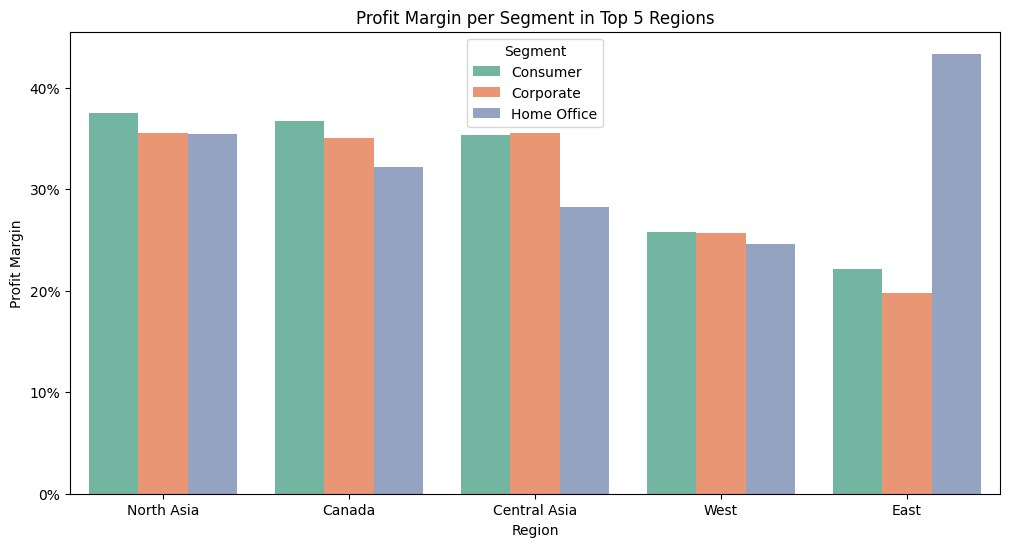

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Hitung Top 5 regions berdasarkan profit margin ---
region_summary = df_sorted.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()
region_summary["profit_margin"] = region_summary["profit"] / region_summary["sales"]

# Ambil Top 5 regions
top_regions = region_summary.sort_values("profit_margin", ascending=False).head(5)
top_region_names = top_regions['region'].tolist()

# --- Hitung profit margin per segment di Top 5 regions ---
segment_region_summary = (
    df_sorted[df_sorted['region'].isin(top_region_names)]
    .groupby(['region','segment']).agg({
        'sales':'sum',
        'profit':'sum'
    }).reset_index()
)

segment_region_summary['profit_margin'] = segment_region_summary['profit'] / segment_region_summary['sales']

# --- Buat kategori region agar urut sesuai Top 5 ---
segment_region_summary['region'] = pd.Categorical(
    segment_region_summary['region'],
    categories=top_region_names,
    ordered=True
)

# --- Urutkan segment per region berdasarkan profit margin descending ---
segment_region_summary = segment_region_summary.sort_values(
    ['region','profit_margin'], ascending=[True, False]
)

# --- Visualisasi profit margin per segment di Top 5 regions ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_region_summary,
    x='region', y='profit_margin',
    hue='segment',
    palette='Set2',
    dodge=True
)
plt.title("Profit Margin per Segment in Top 5 Regions")
plt.ylabel("Profit Margin")
plt.xlabel("Region")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.legend(title='Segment')
plt.show()


In [379]:
segment_region_summary.columns

Index(['region', 'segment', 'sales', 'profit', 'profit_margin'], dtype='object')

In [380]:
persen_satu = segment_region_summary[(segment_region_summary['region'] == 'West') & (segment_region_summary['segment'] == 'Consumer')]['profit_margin']
persen_dua = segment_region_summary[(segment_region_summary['region'] == 'West') & (segment_region_summary['segment'] == 'Corporate')]['profit_margin']
persen_tiga = segment_region_summary[(segment_region_summary['region'] == 'West') & (segment_region_summary['segment'] == 'Home Office')]['profit_margin']

In [381]:
persen_satu, persen_dua, persen_tiga

(18    0.257671
 Name: profit_margin, dtype: float64,
 19    0.256352
 Name: profit_margin, dtype: float64,
 20    0.246074
 Name: profit_margin, dtype: float64)

# Avg Discount per Segment (Top 5 Regions)

C:\Users\72531\AppData\Local\Temp\ipykernel_22324\2534497598.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df_sorted.groupby("region").agg({
C:\Users\72531\AppData\Local\Temp\ipykernel_22324\2534497598.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['region', 'segment'])['discount']


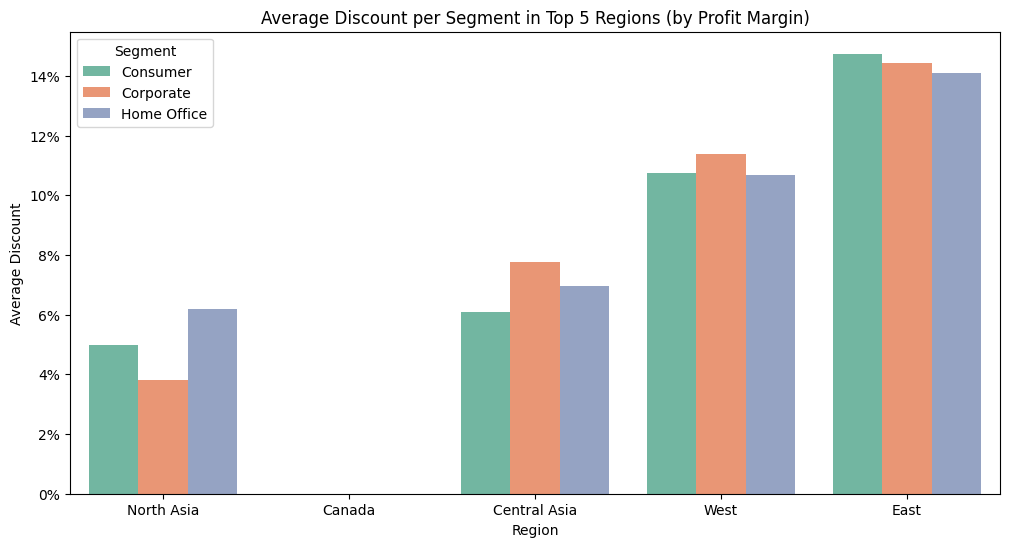

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Hitung Top 5 regions berdasarkan profit margin ---
region_summary = df_sorted.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()

region_summary["profit_margin"] = region_summary["profit"] / region_summary["sales"]

# Ambil 5 region dengan profit margin terbesar
top_regions = region_summary.sort_values("profit_margin", ascending=False).head(5)
top_region_names = top_regions['region'].tolist()

# --- Hitung average discount per segment di masing-masing Top 5 regions ---
segment_region_discount = (
    df_sorted[df_sorted['region'].isin(top_region_names)]
    .groupby(['region', 'segment'])['discount']
    .mean()
    .reset_index()
)

# Urutkan region sesuai ranking profit margin
segment_region_discount['region'] = pd.Categorical(
    segment_region_discount['region'],
    categories=top_region_names,
    ordered=True
)

# --- Visualisasi ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_region_discount,
    x='region', y='discount',
    hue='segment',
    palette='Set2'
)
plt.title("Average Discount per Segment in Top 5 Regions (by Profit Margin)")
plt.ylabel("Average Discount")
plt.xlabel("Region")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.legend(title='Segment')
plt.show()


In [391]:
print(df['region'].unique())
print(df['category'].unique())


['Africa' 'Oceania' 'EMEA' 'North' 'Canada' 'Southeast Asia' 'Central'
 'South' 'Caribbean' 'North Asia' 'East' 'West' 'Central Asia']
['Office Supplies' 'Furniture' 'Technology']


# Analisa pada Region East (Home Office)

In [397]:
# 1. Filter data untuk East + Home Office
east_home_offices = df[(df['region'] == 'East') & (df['segment'] == 'Home Office')]

# 2. Tambahkan kolom profit_margin
east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']

# 3. Urutkan berdasarkan profit_margin dari terbesar ke terkecil
east_home_offices_sorted = east_home_offices.sort_values(['profit','sales'], ascending=[False,False])

# 4. Pilih kolom yang relevan untuk analisis
columns_to_show = ['category', 'sub_category', 'profit', 'discount', 'ship_mode', 'sales']
top10 = east_home_offices_sorted[columns_to_show].head(10).reset_index(drop=True)

# 5. Tampilkan top 10
print(top10)


          category sub_category     profit  discount       ship_mode   sales
0       Technology      Copiers  3919.9888       0.2     First Class  11.200
1       Technology      Copiers  2591.9568       0.0  Standard Class   5.400
2       Technology     Machines  1995.9900       0.0  Standard Class   3.992
3       Technology     Machines  1668.2050       0.0  Standard Class   3.405
4  Office Supplies      Binders  1415.4296       0.2     First Class   4.355
5       Technology     Machines  1114.5120       0.0  Standard Class   2.322
6       Technology     Machines   767.2005       0.0     First Class   1.705
7       Technology  Accessories   742.6320       0.0  Standard Class   1.688
8       Technology       Phones   647.8920       0.0     First Class   2.400
9  Office Supplies      Storage   621.9744       0.0  Standard Class   2.592


C:\Users\72531\AppData\Local\Temp\ipykernel_22324\82299062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']


In [398]:
# Filter data untuk East + Home Office
east_home_offices = df[(df['region'] == 'East') & (df['segment'] == 'Home Office')]

# Ringkasan berdasarkan category
category_summary = east_home_offices.groupby('category').agg(
    total_sales=('sales','sum'),
    total_profit=('profit','sum'),
    avg_discount=('discount','mean')
).reset_index().sort_values('total_profit', ascending=False)

print("Summary per Category:")
print(category_summary)

# Ringkasan berdasarkan sub_category
sub_category_summary = east_home_offices.groupby('sub_category').agg(
    total_sales=('sales','sum'),
    total_profit=('profit','sum'),
    avg_discount=('discount','mean')
).reset_index().sort_values('total_profit', ascending=False)

print("\nSummary per Sub-Category:")
print(sub_category_summary)


Summary per Category:
          category  total_sales  total_profit  avg_discount
2       Technology    16967.887    17709.0675      0.118367
1  Office Supplies    23817.980     8334.2214      0.143421
0        Furniture    20840.038      665.9279      0.156000

Summary per Sub-Category:
   sub_category  total_sales  total_profit  avg_discount
6       Copiers      817.800     7229.9328      0.100000
11     Machines      133.424     5600.1256      0.000000
0   Accessories     6491.938     3022.1950      0.065116
14      Storage     7173.484     2578.9905      0.057895
12        Paper     5535.000     2429.0821      0.085393
13       Phones     9524.725     1856.8141      0.186667
5        Chairs     9248.864     1719.7876      0.132143
3       Binders     4332.496     1694.2615      0.352778
9   Furnishings     3857.056      904.0395      0.093617
1    Appliances     3818.000      775.3683      0.070588
2           Art     1362.000      344.7085      0.061538
7     Envelopes      701.00

# Total sales, Profit, Profit Margin per Category in East (Home Office)

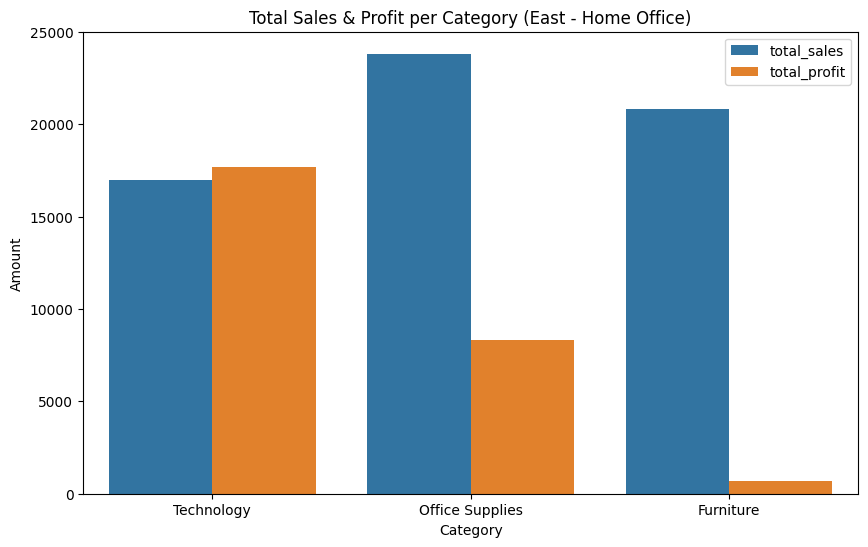

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk East + Home Office
east_home_offices = df[(df['region'] == 'East') & (df['segment'] == 'Home Office')]

# Ringkasan per category
category_summary = east_home_offices.groupby('category').agg(
    total_sales=('sales','sum'),
    total_profit=('profit','sum'),
    avg_discount=('discount','mean')
).reset_index().sort_values('total_profit', ascending=False)

# Ringkasan per sub-category
sub_category_summary = east_home_offices.groupby('sub_category').agg(
    total_sales=('sales','sum'),
    total_profit=('profit','sum'),
    avg_discount=('discount','mean')
).reset_index().sort_values('total_profit', ascending=False)

# ----- Visualisasi Category -----
plt.figure(figsize=(10,6))
sns.barplot(data=category_summary.melt(id_vars='category', value_vars=['total_sales','total_profit']),
            x='category', y='value', hue='variable')
plt.title('Total Sales & Profit per Category (East - Home Office)')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.legend(title='')
plt.show()

# ----- Visualisasi Sub-Category -----
# plt.figure(figsize=(12,6))
# sns.barplot(data=sub_category_summary.melt(id_vars='sub_category', value_vars=['total_sales','total_profit']),
#             x='sub_category', y='value', hue='variable')
# plt.title('Total Sales & Profit per Sub-Category (East - Home Office)')
# plt.ylabel('Amount')
# plt.xlabel('Sub-Category')
# plt.xticks(rotation=45)
# plt.legend(title='')
# plt.show()

# # ----- Visualisasi Avg Discount -----
# plt.figure(figsize=(10,6))
# sns.barplot(data=category_summary, x='category', y='avg_discount', palette='viridis')
# plt.title('Average Discount per Category (East - Home Office)')
# plt.ylabel('Average Discount')
# plt.xlabel('Category')
# plt.show()


C:\Users\72531\AppData\Local\Temp\ipykernel_22324\3588235086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']
C:\Users\72531\AppData\Local\Temp\ipykernel_22324\3588235086.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='category', y='avg_profit_margin', palette='Blues_r')


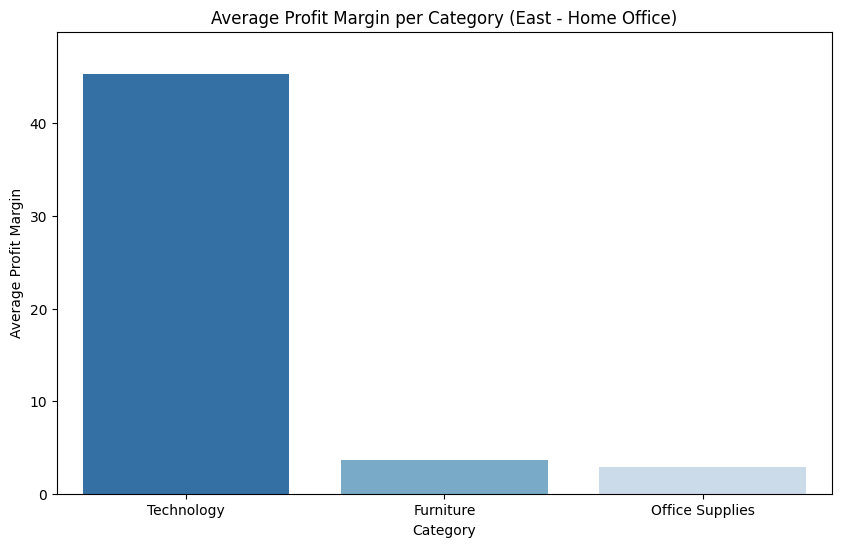

C:\Users\72531\AppData\Local\Temp\ipykernel_22324\3588235086.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_summary, x='label', y='avg_profit_margin', palette='Greens_r')


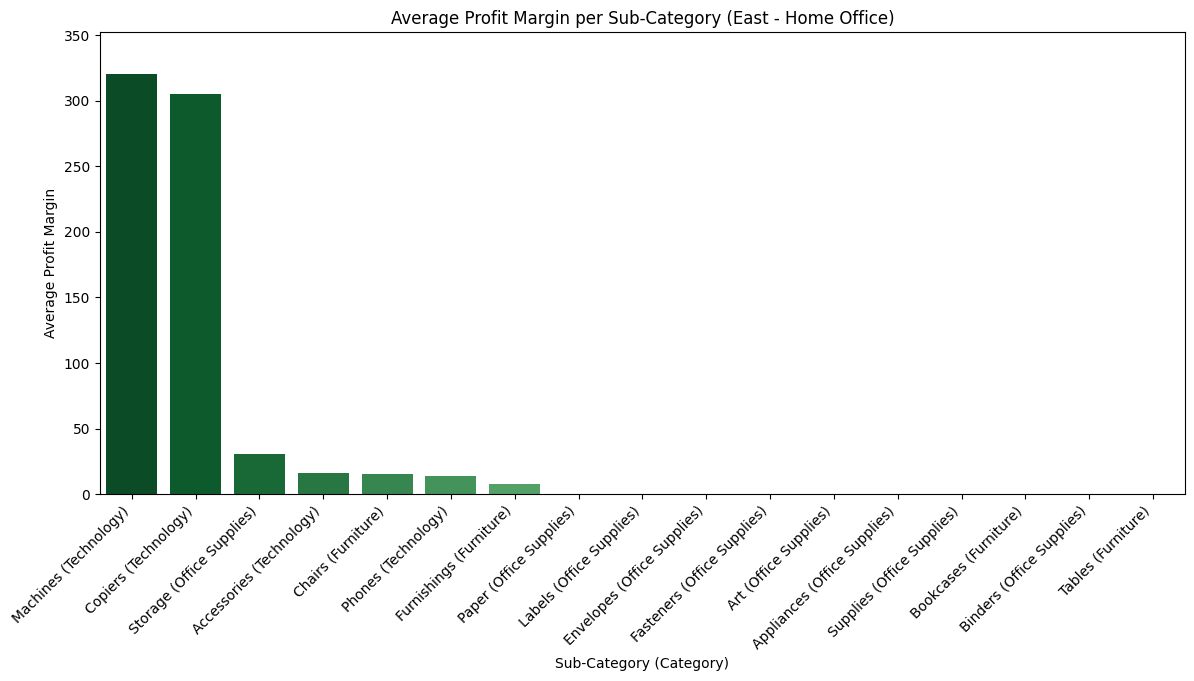

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk East + Home Office
east_home_offices = df[(df['region'] == 'East') & (df['segment'] == 'Home Office')]

# Hitung profit margin per row
east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']

# Ringkasan per category
category_summary = east_home_offices.groupby('category').agg(
    avg_profit_margin=('profit_margin','mean')
).reset_index().sort_values('avg_profit_margin', ascending=False)

# Ringkasan per sub-category, tambahkan info category di label
sub_category_summary = east_home_offices.groupby(['sub_category','category']).agg(
    avg_profit_margin=('profit_margin','mean')
).reset_index().sort_values('avg_profit_margin', ascending=False)

# Buat label x-axis dengan format "Sub-Category (Category)"
sub_category_summary['label'] = sub_category_summary['sub_category'] + ' (' + sub_category_summary['category'] + ')'

# ----- Visualisasi Category -----
plt.figure(figsize=(10,6))
sns.barplot(data=category_summary, x='category', y='avg_profit_margin', palette='Blues_r')
plt.title('Average Profit Margin per Category (East - Home Office)')
plt.ylabel('Average Profit Margin')
plt.xlabel('Category')
plt.ylim(0, category_summary['avg_profit_margin'].max()*1.1)
plt.show()

# ----- Visualisasi Sub-Category dengan caption category -----
plt.figure(figsize=(14,6))
sns.barplot(data=sub_category_summary, x='label', y='avg_profit_margin', palette='Greens_r')
plt.title('Average Profit Margin per Sub-Category (East - Home Office)')
plt.ylabel('Average Profit Margin')
plt.xlabel('Sub-Category (Category)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, sub_category_summary['avg_profit_margin'].max()*1.1)
plt.show()


C:\Users\72531\AppData\Local\Temp\ipykernel_22324\1174834553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']


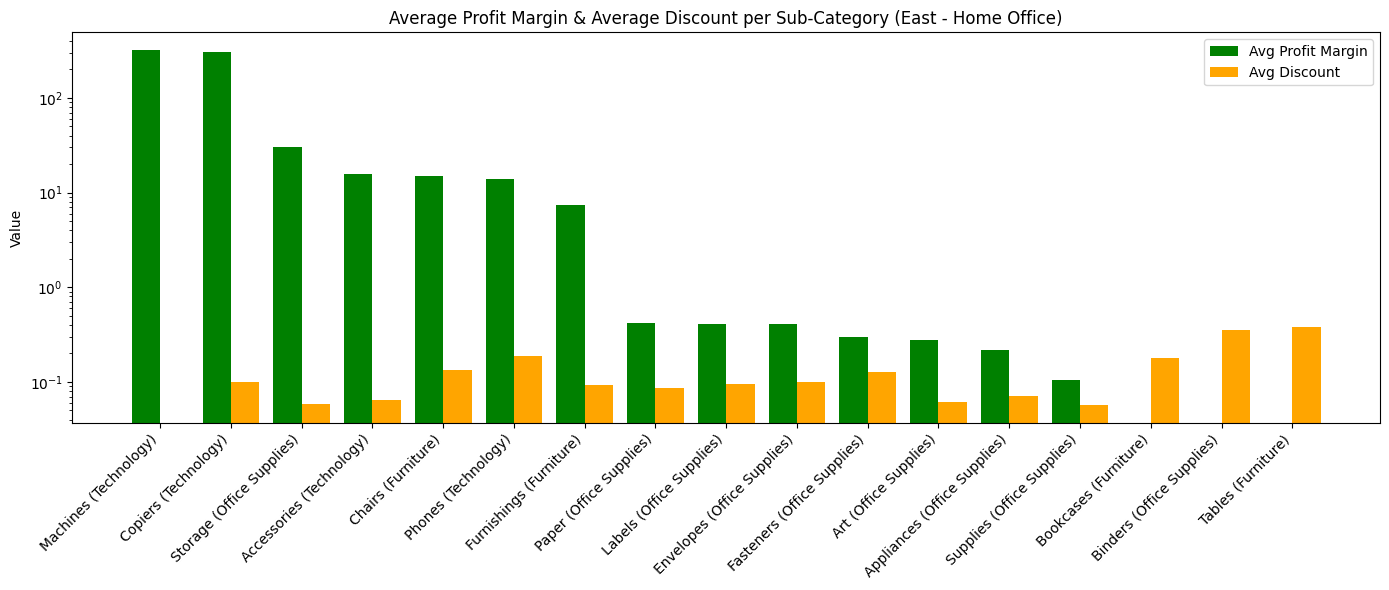

In [407]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data
east_home_offices = df[(df['region'] == 'East') & (df['segment'] == 'Home Office')]
east_home_offices['profit_margin'] = east_home_offices['profit'] / east_home_offices['sales']

# Ringkasan sub-category
sub_category_summary = east_home_offices.groupby(['sub_category','category']).agg(
    avg_profit_margin=('profit_margin','mean'),
    avg_discount=('discount','mean')
).reset_index()

# Buat label x-axis
sub_category_summary['label'] = sub_category_summary['sub_category'] + ' (' + sub_category_summary['category'] + ')'

# Urut berdasarkan profit margin
sub_category_summary = sub_category_summary.sort_values('avg_profit_margin', ascending=False)

# ----- Bar chart -----
x = range(len(sub_category_summary))
width = 0.4

plt.figure(figsize=(14,6))
plt.bar([p - width/2 for p in x], sub_category_summary['avg_profit_margin'], width=width, label='Avg Profit Margin', color='green')
plt.bar([p + width/2 for p in x], sub_category_summary['avg_discount'], width=width, label='Avg Discount', color='orange')

plt.xticks(x, sub_category_summary['label'], rotation=45, ha='right')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Average Profit Margin & Average Discount per Sub-Category (East - Home Office)')
plt.legend()
plt.tight_layout()
plt.show()
